lets start with a version that looks at all motif pairs and shows a motif vs motif matrix for cases where there was a joint match

this should be easiest with the output files i have

following http://localhost:8888/notebooks/March2019/30119/3-01-19%20pairwase%20creation%20of%20group-based%20figures.ipynb


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
colnames_expected = ['motif1', 'motif2', 'majcomp1', 'majcomp2'] 
for i in range(1,6):
    colnames_expected += ['G'+str(i)+'joint', 'G'+str(i)+'ex1', 'G'+str(i)+'ex2', 'G'+str(i)+'other']


In [4]:
DF_ar = []
for i in range(31):
    finname = '30119/2019-02-28motif_pair_stats_part'+str(i)+'.txt'
    DF_ar.append(pd.read_table(finname, names=colnames_expected, header=None, index_col=False))

In [5]:
DF = pd.concat(DF_ar)

In [6]:
DF.head()

,motif1,motif2,majcomp1,majcomp2,G1joint,G1ex1,G1ex2,G1other,G2joint,G2ex1,...,G3ex2,G3other,G4joint,G4ex1,G4ex2,G4other,G5joint,G5ex1,G5ex2,G5other
0,c49-CCAAT+CEBP,c22.GRHL1,7,7,1.0,2,0,1.0,0.0,1,...,0,0.0,0.0,1,0,1.0,1.0,4,0,2.0
1,c49-CCAAT+CEBP,c174.GCM1+2,7,7,1.0,3,0,1.0,0.0,1,...,0,0.0,0.0,0,0,0.0,1.0,7,0,1.0
2,c49-CCAAT+CEBP,c180-TEAD+TEF,7,7,1.0,9,0,1.0,0.0,4,...,0,2.0,0.0,2,0,3.0,1.0,11,0,9.0
3,c49-CCAAT+CEBP,c203-AP-2+2,7,7,1.0,13,0,3.0,0.0,6,...,0,3.0,0.0,5,0,2.0,1.0,17,0,7.0
4,c49-CCAAT+CEBP,c221.GCM1+3,7,7,1.0,6,0,3.0,0.0,0,...,0,1.0,0.0,0,0,2.0,1.0,4,0,5.0


In [7]:
DF['motif1+motif2'] = DF.motif1.values + DF.motif2.values

In [8]:
DF['motif1+majcomp1'] = DF.motif1 +'maj' + DF.majcomp1.values.astype(str)

In [9]:
DF['motif2+majcomp2'] = DF.motif2 +'maj' + DF.majcomp2.values.astype(str)

In [10]:
fungul = DF.pivot(index='motif1+majcomp1', columns='motif2+majcomp2', values='G2joint')

In [11]:
preferredorder = np.argsort(fungul.apply(lambda x: sum(x.isnull().values), axis = 1).values)

In [12]:
preferred_order_mod = np.copy(preferredorder)

In [13]:
preferred_col_order = np.argsort(fungul.apply(lambda x: sum(x.isnull().values), axis = 0).values)


In [14]:
burf = list(fungul.columns.values[preferred_col_order])

In [15]:
burf3 = fungul.index.values[preferredorder] 

In [16]:
np.arange(len(burf3))[~np.in1d(burf3, burf)].tolist()

[2]

In [17]:
burf3mod = np.delete(burf3, np.arange(len(burf3))[~np.in1d(burf3, burf)].tolist())

In [18]:
burf3mod2 = np.concatenate([burf3mod, np.array(burf)[~np.in1d(burf, burf3)]])

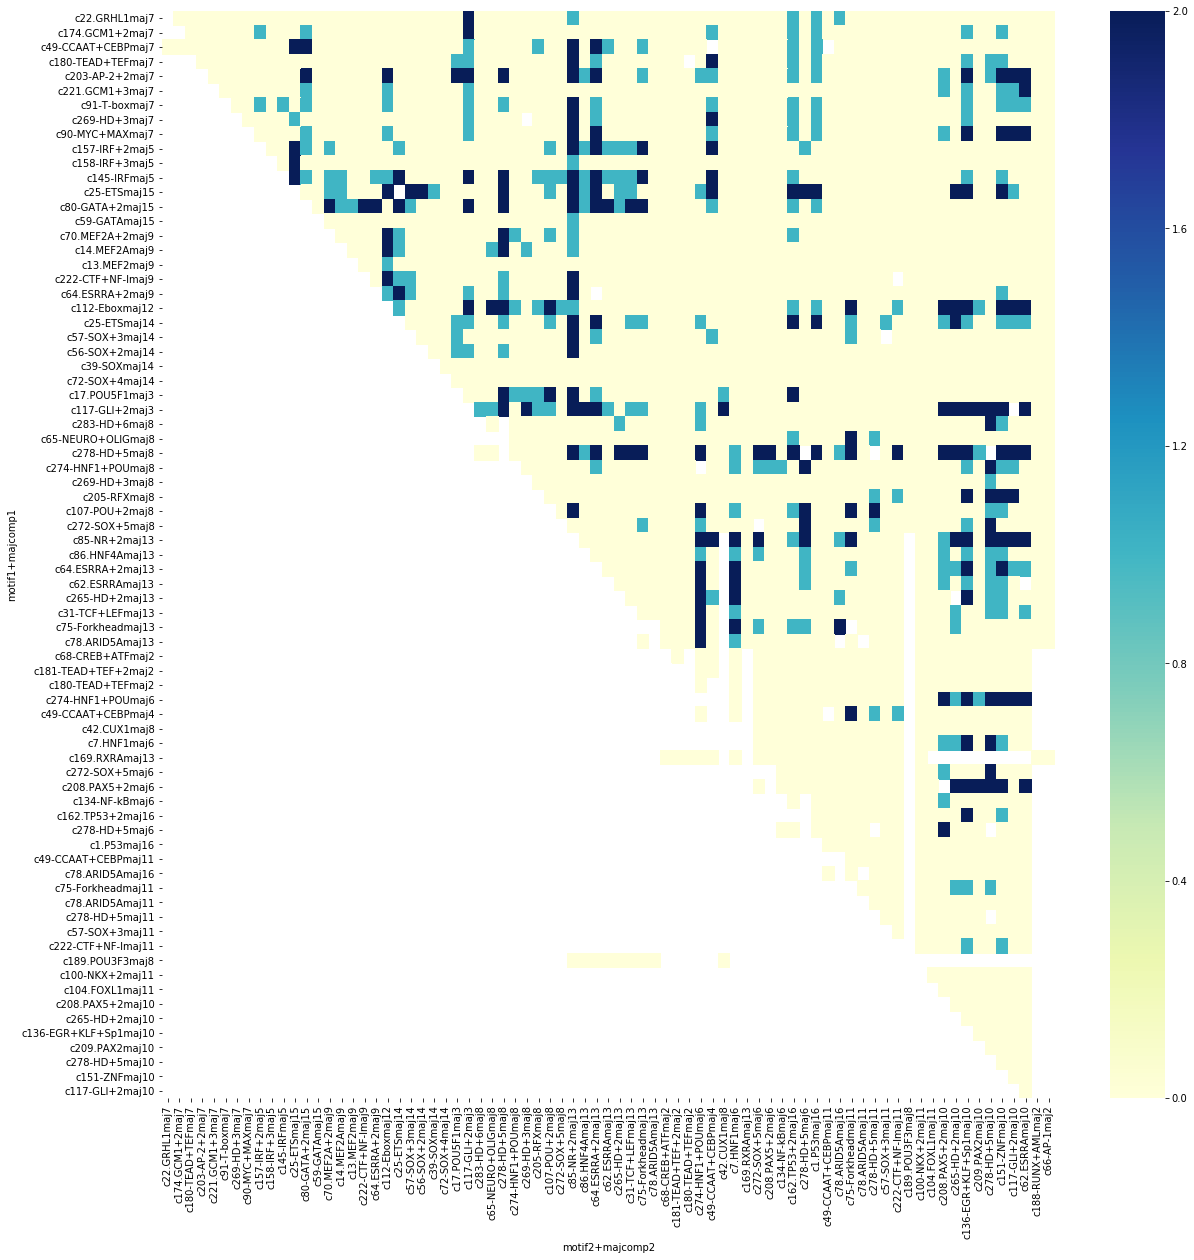

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(data=fungul[burf3mod2].reindex(fungul.index.values[preferredorder]), cmap='YlGnBu' )
plt.show()

In [20]:
plt.figure(figsize=(20,20))
sns.heatmap(data=fungul[burf3mod2].reindex(fungul.index.values[preferredorder]), cmap='YlGnBu' )
plt.savefig('41119_funny_motif_triangle.pdf', bbox_inches='tight')
plt.close()

actually this was unnecessary